In [307]:
# Goal of Collecting the Dataset: The primary goal of collecting this dataset is to analyze and understand the factors influencing student performance in various aspects of their academic life. To explore the relationships between predictor variables such as studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on the performance of students.
# Source of the Dataset: We got Student performance from Kaggel.com and this is the link for the source data (https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)import pandas as pd

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
dataset = "Dataset/Student_Performance.csv"
student_performance = pd.read_csv(dataset)
student_performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [310]:
num_variables = student_performance.shape[1]
num_variables

6

In [311]:
# Data types of variables
data_types = student_performance.dtypes
data_types

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [312]:
num_observations = student_performance.shape[0]
num_observations

10000

In [313]:
num_classes = student_performance.nunique()
num_classes

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

In [314]:
# Sample of raw data
student_performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


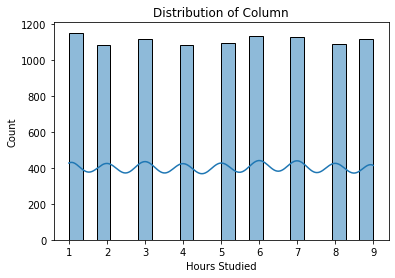

In [315]:
# Variable distributions
sns.histplot(student_performance['Hours Studied'], kde=True)
plt.title('Distribution of Column')
plt.show()

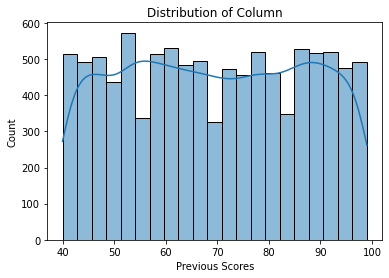

In [316]:
# Variable distributions
sns.histplot(student_performance['Previous Scores'], kde=True)
plt.title('Distribution of Column')
plt.show()

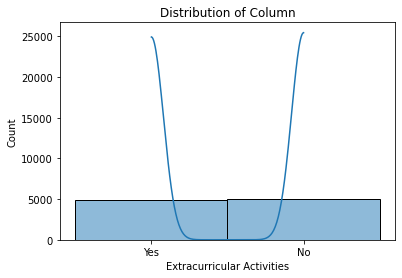

In [317]:
# Variable distributions
sns.histplot(student_performance['Extracurricular Activities'], kde=True)
plt.title('Distribution of Column')
plt.show()

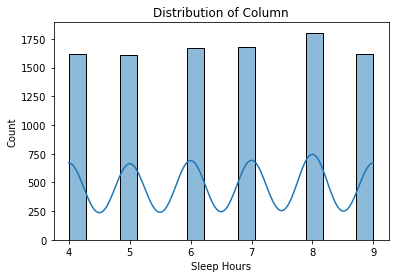

In [318]:
# Variable distributions
sns.histplot(student_performance['Sleep Hours'], kde=True)
plt.title('Distribution of Column')
plt.show()

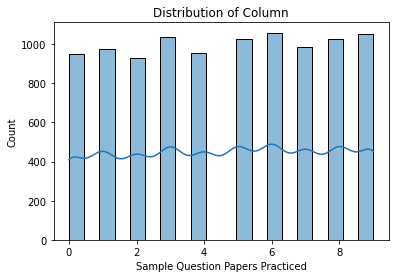

In [319]:
# Variable distributions
sns.histplot(student_performance['Sample Question Papers Practiced'], kde=True)
plt.title('Distribution of Column')
plt.show()

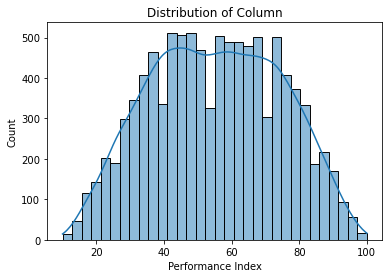

In [320]:
# Variable distributions
sns.histplot(student_performance['Performance Index'], kde=True)
plt.title('Distribution of Column')
plt.show()

In [321]:
# Missing values
missing_values = student_performance.isnull().sum()
missing_values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [322]:
# Statistical summaries(mean)
mean_value = student_performance.mean()
mean_value

Hours Studied                        4.9929
Previous Scores                     69.4457
Sleep Hours                          6.5306
Sample Question Papers Practiced     4.5833
Performance Index                   55.2248
dtype: float64

In [323]:
# Statistical summaries(variance)
variance_value = student_performance.var()
variance_value

Hours Studied                         6.704520
Previous Scores                     300.784930
Sleep Hours                           2.875951
Sample Question Papers Practiced      8.221683
Performance Index                   369.122377
dtype: float64

In [324]:
# change the variable type to integer instead of string to make easier to work with and compare values
def transform_extracurricular_activities(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return -1

def process_data(student_performance):
    student_performance['Extracurricular Activities'] = student_performance['Extracurricular Activities'].apply(transform_extracurricular_activities)
    return student_performance

student_performance = process_data(pd.read_csv(url))
student_performance

FileNotFoundError: [Errno 2] No such file or directory: 'Student_Performance.csv'

In [325]:
# Change 'Performance Index' type from float64 to int64 because its already rounded to the nearest integer
student_performance['Performance Index'] = student_performance['Performance Index'].astype(int)
student_performance['Performance Index']

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

In [326]:
# Grouping the 'Previous Scores' column to make it meaningful categories
student_performance['Previous Scores'] = pd.cut(student_performance['Previous Scores'], [0,60,70,80,90,100])
student_performance.groupby('Previous Scores').size()

Previous Scores
(0, 60]      3552
(60, 70]     1655
(70, 80]     1603
(80, 90]     1704
(90, 100]    1486
dtype: int64

In [327]:
# Grouping the 'Performance Index' column to make it meaningful categories
student_performance['Performance Index'] = pd.cut(student_performance['Performance Index'], [0,20,40,60,80,100])
student_performance.groupby('Performance Index').size()

Performance Index
(0, 20]       268
(20, 40]     2294
(40, 60]     3316
(60, 80]     3052
(80, 100]    1070
dtype: int64

In [328]:
# Deleting duplicate rows to enhances data quality
student_performance = student_performance.drop_duplicates()
student_performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,"(90, 100]",Yes,9,1,"(80, 100]"
1,4,"(80, 90]",No,4,2,"(60, 80]"
2,8,"(0, 60]",Yes,7,2,"(40, 60]"
3,5,"(0, 60]",Yes,5,2,"(20, 40]"
4,7,"(70, 80]",No,8,5,"(60, 80]"
...,...,...,...,...,...,...
9978,6,"(70, 80]",Yes,9,2,"(60, 80]"
9980,2,"(0, 60]",No,6,9,"(0, 20]"
9983,8,"(80, 90]",Yes,4,9,"(60, 80]"
9996,7,"(60, 70]",Yes,8,5,"(40, 60]"


In [329]:
student_performance.to_csv('Dataset/cleaned_student_performance.csv', index=False)